In [234]:
%matplotlib inline
import numpy as np
import math
import scipy.constants as scipy_constants
import matplotlib.pyplot as plt

In [235]:
np.__version__

'1.18.1'

In [236]:
scipy.__version__

'1.4.1'

### Set up axes

In [237]:
pH = np.arange(-1.5,15.5,0.1)
E = np.arange(-4,3,0.1)

### Water stability lines

OER:  

$ 2H_{2}O(l) \rightarrow O_{2}(g)+4H^{+}(aq)+4e^{-} $

HER:

$ 2H^{+} +2e^{-} \rightarrow H_{2}(g)$ 

In [268]:
E_OER = 1.23 -  0.0592*pH
E_HER = 0.00 - 0.0592*pH

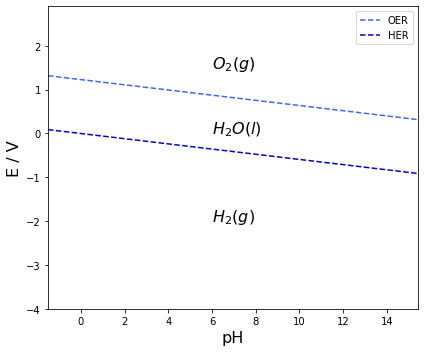

In [276]:
font_size = 16
plt.figure(figsize=(6,5))
plt.plot(pH,E_OER,linestyle='dashed',color='royalblue',label='OER',)
plt.plot(pH,E_HER,linestyle='dashed',color='mediumblue',label='HER',)
plt.xlabel('pH',fontsize=font_size)
plt.ylabel('E / V',fontsize=font_size)
plt.annotate('$ O_{2}(g)$',(6,1.5),fontsize=font_size)
plt.annotate('$ H_{2}O(l)$',(6,0.),fontsize=font_size)
plt.annotate('$ H_{2}(g)$',(6,-2),fontsize=font_size)
plt.xlim(np.min(pH),np.max(pH))
plt.ylim(np.min(E),np.max(E))
plt.legend()
plt.tight_layout()
plt.show()

### Mg oxidation lines

Faraday constant: $F = 96485\,\mathrm{C\,mol^{-1}}$

$\Delta G^\circ = -RT ln(K_{eq})$

$ \mathrm{log}_{10}(K_{eq}) =  \Delta G^\circ/(-5.7 \,\mathrm{kJ}) \quad \mathrm{at}\,\,\,T = 298.15 \,\mathrm{K}$

$\Delta G^\circ = -nFE^\circ$

In [240]:
F = scipy_constants.physical_constants['Faraday constant'][0]
R = scipy_constants.physical_constants['molar gas constant'][0]
T = 298.15

ln_to_log10 = math.log(10,np.exp(1))

activity_Mg_ions = 1.e-3

In [241]:
log_10_K_eq_1 = (dG_1/(-1*R*T*ln_to_log10/1000))

#### Three possible reactions

$Mg(OH)_{2}(s) + 2H^{+}(aq) \rightarrow Mg^{2+}(aq)+2H_{2}O(l) \quad \: \, \, \, \Delta G^\circ = -95.7\,\mathrm{kJ} \quad \quad (1) $

$Mg^{2+}(aq)+2e^{-}\rightarrow Mg(s) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \, \Delta G^\circ = 454.8\,\mathrm{kJ} \quad \quad (2) $

$Mg(OH)_{2}(s)+2H^{+}+2e^{-} \rightarrow Mg(s) + 2H_{2}O(l)\quad \quad \Delta G^\circ = 359.1\,\mathrm{kJ} \quad \quad (3) $

In [242]:
dG_1 = -95.7
dG_2 = 454.8
dG_3 = 359.1

### Reaction 1

$K_{eq} = [Mg^{2+}]/[H^{+}]^{2}$

$[H^{+}]^{2} = [Mg^{2+}]/K_{eq}$

$\mathrm{log}_{10}([H^{+}]^{2}) = \mathrm{log}_{10}([Mg^{2+}/K_{eq})$

$-2 \, \mathrm{pH} = \mathrm{log}_{10}([Mg^{2+}])-\mathrm{log}_{10}(K_{eq})$

$ \mathrm{pH} = \frac{\mathrm{log}_{10}(K_{eq})-\mathrm{log}_{10}([Mg^{2+}])}{2}$



In [277]:
log_10_K_eq_1

16.765914625625246

In [278]:
activity_Mg_ions

0.001

In [279]:
Line_1 = (log_10_K_eq_1 - math.log(activity_Mg_ions,10))/2

In [280]:
n_2 = 2
E_2 = dG_2/(-1*F*n_2)*1000
Line_2 = E_2 + (0.0592/2)*math.log(activity_Mg_ions,10)
E_2

-2.3568349199148715

In [281]:
n_3 = 2
E_3 = dG_3/(-1*F*n_3)*1000
Line_3 = E_3-0.0592*pH
E_3

-1.8609046168457135

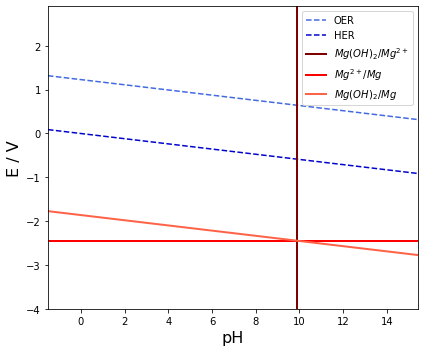

In [282]:
font_size = 16
plt.figure(figsize=(6,5))
plt.plot(pH,E_OER,linestyle='dashed',color='royalblue',label='OER',)
plt.plot(pH,E_HER,linestyle='dashed',color='mediumblue',label='HER',)
plt.axvline(x=Line_1,linewidth=2,color='maroon',label='$Mg(OH)_2/Mg^{2+}$')
plt.axhline(y=Line_2,linewidth=2,color='red',label='$Mg^{2+}/Mg$')
plt.plot(pH,Line_3,linewidth=2,color='tomato',label='$Mg(OH)_2/Mg$')
plt.xlabel('pH',fontsize=font_size)
plt.ylabel('E / V',fontsize=font_size)
plt.xlim(np.min(pH),np.max(pH))
plt.ylim(np.min(E),np.max(E))
plt.legend()
plt.tight_layout()
plt.show()

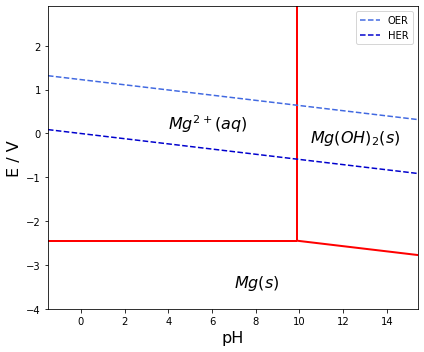

In [283]:
font_size = 16
plt.figure(figsize=(6,5))
plt.plot(pH,E_OER,linestyle='dashed',color='royalblue',label='OER',)
plt.plot(pH,E_HER,linestyle='dashed',color='mediumblue',label='HER',)
plt.vlines(x=Line_1,ymin=Line_2,ymax=np.max(E),linewidth=2,color='red')
plt.hlines(y=Line_2,xmin=np.min(pH),xmax=Line_1,linewidth=2,color='red')
plt.plot(pH[Line_3<Line_2],Line_3[Line_3<Line_2],linewidth=2,color='red')
plt.xlabel('pH',fontsize=font_size)
plt.ylabel('E / V',fontsize=font_size)
plt.xlim(np.min(pH),np.max(pH))
plt.ylim(np.min(E),np.max(E))
plt.annotate('$Mg^{2+}(aq)$',(4,0.1),fontsize=font_size)
plt.annotate('$Mg(OH)_{2}(s)$',(10.5,-0.2),fontsize=font_size)
plt.annotate('$Mg(s)$',(7,-3.5),fontsize=font_size)
plt.legend()
plt.tight_layout()
plt.show()

In [368]:
def generate_Mg_Pourbaix(activity,T=298.15):
    F = scipy_constants.physical_constants['Faraday constant'][0]
    R = scipy_constants.physical_constants['molar gas constant'][0]
    ln_to_log10 = math.log(10,np.exp(1))

    dG_1 = -95.7
    dG_2 = 454.8
    dG_3 = 359.1
    log_10_K_eq_1 = (dG_1/(-1*R*T*ln_to_log10/1000))
    Line_1 = (log_10_K_eq_1 - math.log(activity,10))/2
    n_2 = 2
    E_2 = dG_2/(-1*F*n_2)*1000
    Line_2 = E_2 + (0.0592/2)*math.log(activity,10)
    n_3 = 2
    E_3 = dG_3/(-1*F*n_3)*1000
    Line_3 = E_3-0.0592*pH
    return [Line_1, Line_2, Line_3]

def plot_Mg_Pourbaix(Lines,color_select='red'):
    Line_1 = Lines[0]
    Line_2 = Lines[1]
    Line_3 = Lines[2]
    font_size = 16
    plt.vlines(x=Line_1,ymin=Line_2,ymax=np.max(E),linewidth=2,color=color_select)
    plt.hlines(y=Line_2,xmin=np.min(pH),xmax=Line_1,linewidth=2,color=color_select)
    plt.plot(pH[Line_3<Line_2][pH[Line_3<Line_2]>Line_1],Line_3[Line_3<Line_2][pH[Line_3<Line_2]>Line_1],linewidth=2,color=color_select)
    plt.xlabel('pH',fontsize=font_size)
    plt.ylabel('E / V',fontsize=font_size)
    plt.xlim(np.min(pH),np.max(pH))
    plt.ylim(np.min(E),np.max(E))
    plt.legend()
    plt.tight_layout()
    return

def plot_multiple_Mg_Pourbaix(activity_list,color_list):
    plt.figure(figsize=(6,5))
    plt.plot(pH,E_OER,linestyle='dashed',color='royalblue',label='OER',)
    plt.plot(pH,E_HER,linestyle='dashed',color='mediumblue',label='HER',)
    for i in range(0,len(activity_list)):
        plot_Mg_Pourbaix(generate_Mg_Pourbaix(activity_list[i]),color_select=color_list[i])
        plt.annotate('$10^{x} \, \mathrm{M}$'.replace('x',"{:,.0f}".format(math.log(activity_list[i],10))),(0,-1-i/2),color=color_list[i],fontsize=14,weight='bold')
    plt.show()
    return

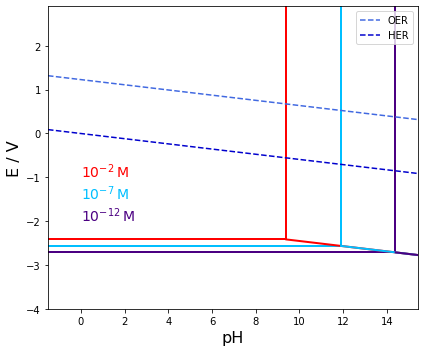

In [369]:
activity_list = [1e-2,1e-7,1e-12]
color_list = ['red','deepskyblue','indigo']

plot_multiple_Mg_Pourbaix(activity_list,color_list)